# Average out each articulation feature in the control group

We are going to take a series of articulation features extracted form the CN subgroup of a database. Our aim is to generate an average of these features. We have 2 tasks ("lectura" and "pataka"), so we'll make an "average" for each task. Also, we want to leave out about 20% of the data for testing purposes.

Let's begin by loading the data and taking a look at it.


In [1]:
# import necesary libraries
import os
import json
import numpy as np
from scipy.spatial.distance import cosine
import pandas as pd
import matplotlib.pyplot as plt

%cd proccesed/

/home/udesa_ubuntu/tell_lambda_workers/test/articulation/proccesed


In [2]:
fondecyt_cn = pd.read_csv('CN_disvoice.csv')
fondecyt_cn.head()

,filename,avg BBEon_1,avg BBEon_2,avg BBEon_3,avg BBEon_4,avg BBEon_5,avg BBEon_6,avg BBEon_7,avg BBEon_8,avg BBEon_9,...,kurtosis DDMFCCoff_9,kurtosis DDMFCCoff_10,kurtosis DDMFCCoff_11,kurtosis DDMFCCoff_12,kurtosis F1,kurtosis DF1,kurtosis DDF1,kurtosis F2,kurtosis DF2,kurtosis DDF2
0,/home/udesa_ubuntu/Documents/fondecyt/CN/CS002...,-1.347135,-0.454923,-0.872094,-1.232488,-1.291609,-1.494240,-1.900199,-2.460602,-2.763388,...,1.024591,1.835584,2.051488,0.924213,4.786296,4.009641,3.837096,3.967126,4.112588,4.903926
1,/home/udesa_ubuntu/Documents/fondecyt/CN/CS002...,-1.778633,-0.998506,-1.311620,-1.647969,-1.841327,-2.249961,-2.729209,-3.146226,-3.268921,...,1.875667,0.635026,1.256580,1.507022,2.546706,6.535446,5.137583,0.884774,5.102068,5.125417
2,/home/udesa_ubuntu/Documents/fondecyt/CN/SL003...,-1.516880,-0.653088,-0.797430,-1.060630,-1.293824,-1.726211,-2.296614,-2.469264,-2.929572,...,1.234591,2.194756,2.640722,1.377717,8.273225,13.526852,13.146038,1.251328,7.633775,7.697933
3,/home/udesa_ubuntu/Documents/fondecyt/CN/SL003...,-1.434472,-0.478817,-0.683705,-0.791789,-0.933026,-1.249266,-1.864121,-2.167757,-2.724570,...,8.633757,3.650503,2.932106,1.311581,14.067711,13.816922,14.069832,1.819544,4.827385,4.823087
4,/home/udesa_ubuntu/Documents/fondecyt/CN/CS003...,-1.753780,-1.091071,-1.116782,-1.874331,-1.793263,-1.985555,-2.425010,-2.853133,-3.338507,...,6.974551,1.123623,4.382145,5.380652,11.157129,13.184195,12.423228,7.462169,14.187406,10.309534


Great, now let's split the data into the two tasks, we'll take advantage of the fact that the filenames end with the task name.

Then, lets split the dataframes into average set, and test set.

In [3]:
task1 = "Lectura.wav"
task2 = "Pataka.wav"

fondecyt_cn_lectura = fondecyt_cn[fondecyt_cn['filename'].str.endswith(task1)]
fondecyt_cn_pataka = fondecyt_cn[fondecyt_cn['filename'].str.endswith(task2)]

print("amount of subjetcs in for the ´lectura´ task in CN subgroup: ", len(fondecyt_cn_lectura))
print("amount of subjetcs in for the ´pataka´ task in CN subgroup: ", len(fondecyt_cn_pataka))


# split the dataframe into two, for average and test sets
fondecyt_cn_lectura_avg = fondecyt_cn_lectura.sample(frac=0.8)
fondecyt_cn_lectura_test = fondecyt_cn_lectura.drop(fondecyt_cn_lectura_avg.index)

fondecyt_cn_pataka_avg = fondecyt_cn_pataka.sample(frac=0.8)
fondecyt_cn_pataka_test = fondecyt_cn_pataka.drop(fondecyt_cn_pataka_avg.index)

print("amount of subjetcs in for the ´lectura´ task in CN subgroup for averaging: ", len(fondecyt_cn_lectura_avg))
print("amount of subjetcs in for the ´pataka´ task in CN subgroup for averaging: ", len(fondecyt_cn_pataka_avg))
print("amount of subjetcs in for the ´lectura´ task in CN subgroup for testing: ", len(fondecyt_cn_lectura_test))
print("amount of subjetcs in for the ´pataka´ task in CN subgroup for testing: ", len(fondecyt_cn_pataka_test))

amount of subjetcs in for the ´lectura´ task in CN subgroup:  49
amount of subjetcs in for the ´pataka´ task in CN subgroup:  47
amount of subjetcs in for the ´lectura´ task in CN subgroup for averaging:  39
amount of subjetcs in for the ´pataka´ task in CN subgroup for averaging:  38
amount of subjetcs in for the ´lectura´ task in CN subgroup for testing:  10
amount of subjetcs in for the ´pataka´ task in CN subgroup for testing:  9


Save the averages in json format, and the test sets in csv format.

In [4]:
fondecyt_cn_lectura_mean = fondecyt_cn_lectura_avg.iloc[:, 1:].mean()
fondecyt_cn_pataka_mean = fondecyt_cn_pataka_avg.iloc[:, 1:].mean()

fondecyt_cn_lectura_mean.to_json('fondecyt_cn_lectura_averages.json')
fondecyt_cn_pataka_mean.to_json('fondecyt_cn_pataka_averages.json')

fondecyt_cn_lectura_test.to_csv('fondecyt_cn_lectura_test.csv')
fondecyt_cn_pataka_test.to_csv('fondecyt_cn_pataka_test.csv')


## Similar procedure to the PD subgroup
Since we'll be making comparisons to the PD subgroup, we'll use a similar procedure, skipping the part where we divide into two sets, and just saving the result in csv format.

In [5]:
fondecyt_pd = pd.read_csv('PD_disvoice.csv')

fondecyt_pd_lectura = fondecyt_pd[fondecyt_pd['filename'].str.endswith(task1)]
fondecyt_pd_pataka = fondecyt_pd[fondecyt_pd['filename'].str.endswith(task2)]

print("amount of subjetcs in for the ´lectura´ task in PD subgroup: ", len(fondecyt_pd_lectura))
print("amount of subjetcs in for the ´pataka´ task in PD subgroup: ", len(fondecyt_pd_pataka))

#save to csv
fondecyt_pd_lectura.to_csv('fondecyt_pd_lectura.csv')
fondecyt_pd_pataka.to_csv('fondecyt_pd_pataka.csv')

amount of subjetcs in for the ´lectura´ task in PD subgroup:  23
amount of subjetcs in for the ´pataka´ task in PD subgroup:  26


# Cosine distance between two sets of articulation features

Now that we have our "average" articulation features for the CN and PD subgroups, we can calculate the cosine distance between the test set of the CN subgroup, and the PD subgroup ot obtain a range of distances.

First, let's define a function to load the json files that store the articulation features, and make a split into two arrays, for onset and offset features

In [6]:
def articulation_dict_to_array(articulation_path):
    """ takes two json files that store articulation features as given by the aws lambda implementation of disvoice
    and returns the cosine distance between the onset and offset features
    """
    
    with open(articulation_path, "r") as articulation_features:
        articulation = json.load(articulation_features)


    onset_features = []
    offset_features = []
    for i in range(1, 23):
        onset_features.append(articulation[f"avg BBEon_{i}"])
        offset_features.append(articulation[f"avg BBEoff_{i}"])

    for i in range(1, 13):
        onset_features.append(articulation[f"avg MFCCon_{i}"])
        onset_features.append(articulation[f"avg DMFCCon_{i}"])
        onset_features.append(articulation[f"avg DDMFCCon_{i}"])
        offset_features.append(articulation[f"avg MFCCoff_{i}"])
        offset_features.append(articulation[f"avg DMFCCoff_{i}"])
        offset_features.append(articulation[f"avg DMFCCoff_{i}"])
    
    return np.array(onset_features), np.array(offset_features)

## For now, lets concentrate on the Lectura task.

In [7]:
cn_lectura_mean_onset, cn_lectura_mean_offset = articulation_dict_to_array("fondecyt_cn_lectura_averages.json")

In [8]:
# read the fondecyt_cn_lecutra_test.csv file
fondecyt_cn_lectura_test = pd.read_csv('fondecyt_cn_lectura_test.csv')
fondecyt_pd_lectura = pd.read_csv('fondecyt_pd_lectura.csv')

# lets transform each row into a json file. filename column will be used as the filename, and then each column number will be
# used as the key, and the value will be the value of the cell

for index, row in fondecyt_cn_lectura_test.iterrows():
    filename = row['filename']
    row = row.drop('filename')
    row = row.to_dict()
    filename = os.path.split(filename)[-1]
    with open(f"fondecyt_cn_lectura_test/{filename}.json", "w") as json_file:
        json.dump(row, json_file)

for index, row in fondecyt_pd_lectura.iterrows():
    filename = row['filename']
    row = row.drop('filename')
    row = row.to_dict()
    filename = os.path.split(filename)[-1]
    with open(f"fondecyt_pd_lectura/{filename}.json", "w") as json_file:
        json.dump(row, json_file)

Now, for each file in the "fondecyt_cn_lectura_test" folder, we'll calculate the distance to cn_lectura_mean_onset and cn_lectura_mean_offset

In [9]:
onset_distances_cn_lectura_test  = []
offset_distances_cn_lectura_test  = []

for articulation_dict in os.listdir("fondecyt_cn_lectura_test"):
    if articulation_dict.endswith(".json"):
        onset, offset = articulation_dict_to_array(f"fondecyt_cn_lectura_test/{articulation_dict}")
        # print(f"cosine distance between cn_lectura_mean_onset and {articulation_dict} : ", cosine(cn_lectura_mean_onset, onset))
        # print(f"cosine distance between cn_lectura_mean_offset and {articulation_dict} : ", cosine(cn_lectura_mean_offset, offset))
        onset_distances_cn_lectura_test .append(cosine(cn_lectura_mean_onset, onset))
        offset_distances_cn_lectura_test .append(cosine(cn_lectura_mean_offset, offset))

print("results for the ´lectura´ task in CN subgroup")
print("mean cosine distance between onset features: ", np.mean(onset_distances_cn_lectura_test ))
print("max cosine distance between onset features: ", np.max(onset_distances_cn_lectura_test ))
print("min cosine distance between onset features: ", np.min(onset_distances_cn_lectura_test ))
print()
print("mean cosine distance between offset features: ", np.mean(offset_distances_cn_lectura_test ))
print("max cosine distance between offset features: ", np.max(offset_distances_cn_lectura_test ))
print("min cosine distance between offset features: ", np.min(offset_distances_cn_lectura_test ))


results for the ´lectura´ task in CN subgroup
mean cosine distance between onset features:  0.12015657465438659
max cosine distance between onset features:  0.22473131696192317
min cosine distance between onset features:  0.033551797472127776

mean cosine distance between offset features:  0.05131949162238407
max cosine distance between offset features:  0.07849589648139021
min cosine distance between offset features:  0.013648031754692536


Now, lets do the same for the PD subgroup

In [10]:
onset_distances_pd_lectura = []
offset_distances_pd_lectura = []

for articulation_dict in os.listdir("fondecyt_pd_lectura"):
    if articulation_dict.endswith(".json"):
        onset, offset = articulation_dict_to_array(f"fondecyt_pd_lectura/{articulation_dict}")
        # print(f"cosine distance between cn_lectura_mean_onset and {articulation_dict} : ", cosine(cn_lectura_mean_onset, onset))
        # print(f"cosine distance between cn_lectura_mean_offset and {articulation_dict} : ", cosine(cn_lectura_mean_offset, offset))
        onset_distances_pd_lectura.append(cosine(cn_lectura_mean_onset, onset))
        offset_distances_pd_lectura.append(cosine(cn_lectura_mean_offset, offset))

print("results for the ´lectura´ task in PD subgroup")
print("mean cosine distance between onset features: ", np.mean(onset_distances_pd_lectura))
print('standard deviation - cosine distance:        ', np.std(onset_distances_pd_lectura))
print("max cosine distance between onset features: ", np.max(onset_distances_pd_lectura))
print("min cosine distance between onset features: ", np.min(onset_distances_pd_lectura))
print()
print("mean cosine distance between offset features: ", np.mean(offset_distances_pd_lectura))
print('standard deviation - cosine distance:       : ', np.std(offset_distances_pd_lectura))
print("max cosine distance between offset features: ", np.max(offset_distances_pd_lectura))
print("min cosine distance between offset features: ", np.min(offset_distances_pd_lectura))

results for the ´lectura´ task in PD subgroup
mean cosine distance between onset features:  0.08521112071618811
standard deviation - cosine distance:         0.0331891277875158
max cosine distance between onset features:  0.1403845946830964
min cosine distance between onset features:  0.014831190722892962

mean cosine distance between offset features:  0.0332115234794941
standard deviation - cosine distance:       :  0.013980224874882648
max cosine distance between offset features:  0.06329882670505893
min cosine distance between offset features:  0.011160465949684228


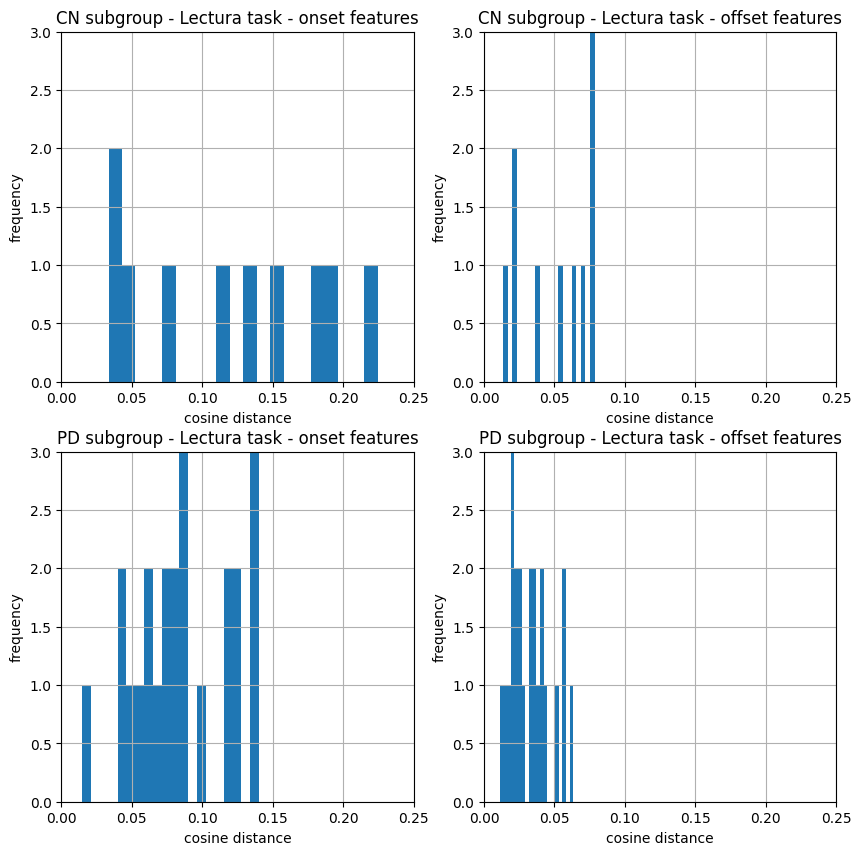

In [11]:
#now lets plot the results
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].hist(onset_distances_cn_lectura_test, bins=20)
ax[0, 0].set_title('CN subgroup - Lectura task - onset features')
ax[0, 1].hist(offset_distances_cn_lectura_test, bins=20)
ax[0, 1].set_title('CN subgroup - Lectura task - offset features')
ax[1, 0].hist(onset_distances_pd_lectura, bins=20)
ax[1, 0].set_title('PD subgroup - Lectura task - onset features')
ax[1, 1].hist(offset_distances_pd_lectura, bins=20)
ax[1, 1].set_title('PD subgroup - Lectura task - offset features')
#set x lim
for i in range(2):
    for j in range(2):
        ax[i, j].set_xlim(0, 0.25)
        ax[i, j].set_ylim(0, 3)
        ax[i, j].set_xlabel('cosine distance')
        ax[i, j].set_ylabel('frequency')
        ax[i, j].grid()
plt.show()

## Ok, let's repeat for the Pataka task

In [12]:
cn_pataka_mean_onset, cn_pataka_mean_offset = articulation_dict_to_array("fondecyt_cn_pataka_averages.json")

In [13]:
# read the fondecyt_cn_lecutra_test.csv file
fondecyt_cn_pataka_test = pd.read_csv('fondecyt_cn_pataka_test.csv')
fondecyt_pd_pataka= pd.read_csv('fondecyt_pd_pataka.csv')

# lets transform each row into a json file. filename column will be used as the filename, and then each column number will be
# used as the key, and the value will be the value of the cell

for index, row in fondecyt_cn_pataka_test.iterrows():
    filename = row['filename']
    row = row.drop('filename')
    row = row.to_dict()
    filename = os.path.split(filename)[-1]
    with open(f"fondecyt_cn_pataka/{filename}.json", "w") as json_file:
        json.dump(row, json_file)

for index, row in fondecyt_pd_pataka.iterrows():
    filename = row['filename']
    row = row.drop('filename')
    row = row.to_dict()
    filename = os.path.split(filename)[-1]
    with open(f"fondecyt_pd_pataka/{filename}.json", "w") as json_file:
        json.dump(row, json_file)

In [14]:
onset_distances_cn_pataka  = []
offset_distances_cn_pataka  = []

for articulation_dict in os.listdir("fondecyt_cn_pataka"):
    if articulation_dict.endswith(".json"):
        onset, offset = articulation_dict_to_array(f"fondecyt_cn_pataka/{articulation_dict}")
        onset_distances_cn_pataka .append(cosine(cn_pataka_mean_onset, onset))
        offset_distances_cn_pataka .append(cosine(cn_pataka_mean_offset, offset))

print("results for the pataka task in CN subgroup")
print("mean cosine distance between onset features: ", np.mean(onset_distances_cn_pataka ))
print('standard deviation - cosine distance:        ', np.std(onset_distances_cn_pataka))
print("max cosine distance between onset features: ", np.max(onset_distances_cn_pataka))
print("min cosine distance between onset features: ", np.min(onset_distances_cn_pataka ))
print()
print("mean cosine distance between offset features: ", np.mean(offset_distances_cn_pataka ))
print('standard deviation - cosine distance:        ', np.std(offset_distances_cn_pataka))
print("max cosine distance between offset features: ", np.max(offset_distances_cn_pataka ))
print("min cosine distance between offset features: ", np.min(offset_distances_cn_pataka ))


results for the pataka task in CN subgroup
mean cosine distance between onset features:  0.1825199418249649
standard deviation - cosine distance:         0.07627777896401743
max cosine distance between onset features:  0.30607695441855887
min cosine distance between onset features:  0.09544124003047239

mean cosine distance between offset features:  0.044412998103164535
standard deviation - cosine distance:         0.04112725500743757
max cosine distance between offset features:  0.15558448045336326
min cosine distance between offset features:  0.014032045392138093


In [15]:
onset_distances_pd_pataka = []
offset_distances_pd_pataka = []

for articulation_dict in os.listdir("fondecyt_pd_pataka"):
    if articulation_dict.endswith(".json"):
        onset, offset = articulation_dict_to_array(f"fondecyt_pd_pataka/{articulation_dict}")
        onset_distances_pd_pataka.append(cosine(cn_pataka_mean_onset, onset))
        offset_distances_pd_pataka.append(cosine(cn_pataka_mean_offset, offset))

print("results for the pataka task in PD subgroup")
print("mean cosine distance between onset features: ", np.mean(onset_distances_pd_pataka))
print("max cosine distance between onset features: ", np.max(onset_distances_pd_pataka))
print("min cosine distance between onset features: ", np.min(onset_distances_pd_pataka))
print()
print("mean cosine distance between offset features: ", np.mean(offset_distances_pd_pataka))
print("max cosine distance between offset features: ", np.max(offset_distances_pd_pataka))
print("min cosine distance between offset features: ", np.min(offset_distances_pd_pataka))

results for the pataka task in PD subgroup
mean cosine distance between onset features:  0.19469007371609212
max cosine distance between onset features:  0.5667905009401817
min cosine distance between onset features:  0.09728937976852203

mean cosine distance between offset features:  0.05779789465513438
max cosine distance between offset features:  0.32334426498999
min cosine distance between offset features:  0.01427728983687393


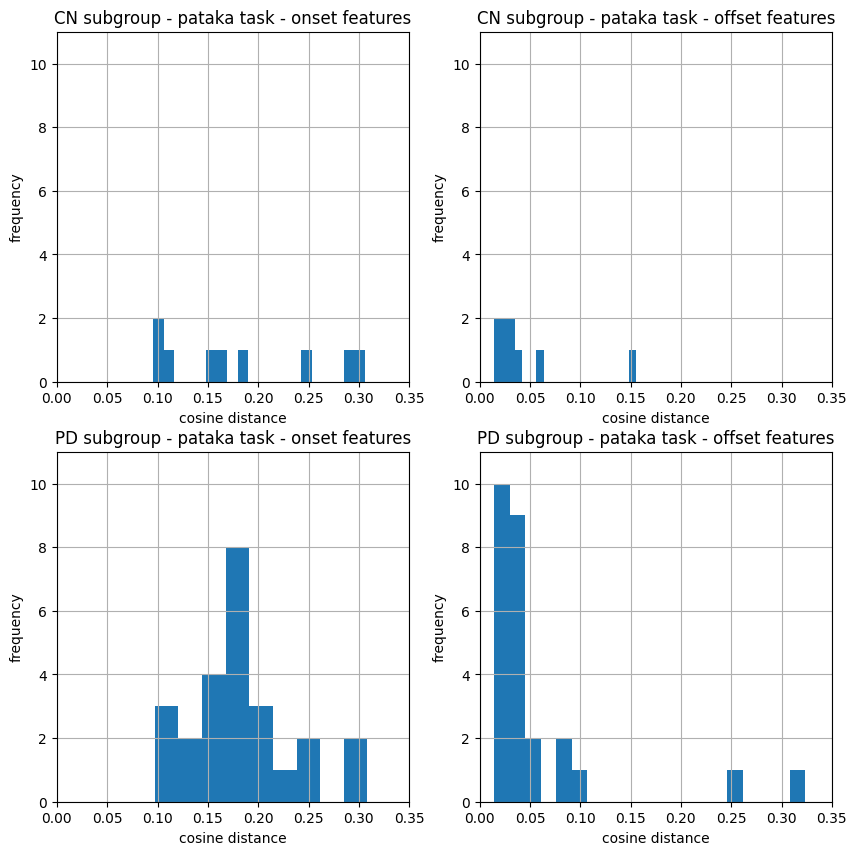

In [16]:
#now lets plot the results
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].hist(onset_distances_cn_pataka, bins=20)
ax[0, 0].set_title('CN subgroup - pataka task - onset features')
ax[0, 1].hist(offset_distances_cn_pataka, bins=20)
ax[0, 1].set_title('CN subgroup - pataka task - offset features')
ax[1, 0].hist(onset_distances_pd_pataka, bins=20)
ax[1, 0].set_title('PD subgroup - pataka task - onset features')
ax[1, 1].hist(offset_distances_pd_pataka, bins=20)
ax[1, 1].set_title('PD subgroup - pataka task - offset features')
#set x lim
for i in range(2):
    for j in range(2):
        ax[i, j].set_xlim(0, 0.35)
        ax[i, j].set_ylim(0, 11)
        ax[i, j].set_xlabel('cosine distance')
        ax[i, j].set_ylabel('frequency')
        ax[i, j].grid()
plt.show()